In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'Data\BikeDataset.csv', index_col='instant')

array([[<Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>,
        <Axes: title={'center': 'day'}>, <Axes: title={'center': 'hr'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

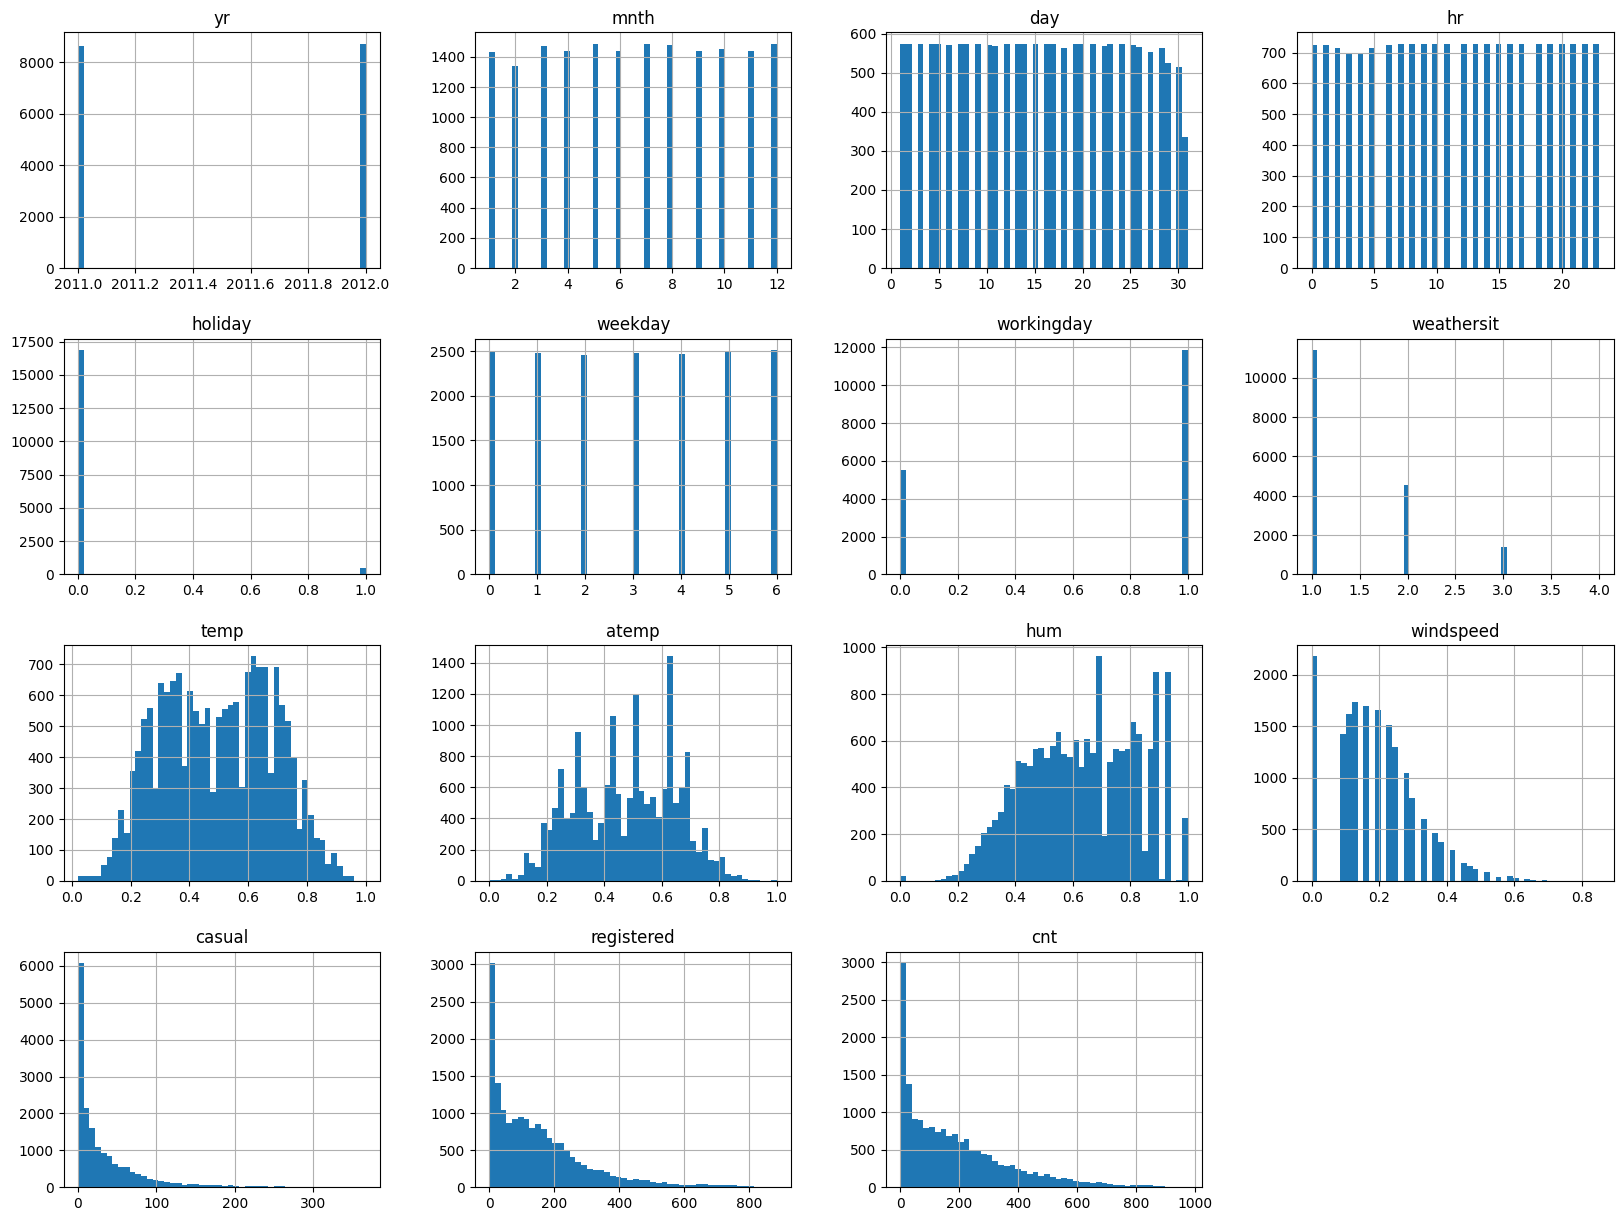

In [3]:
df.hist(bins=50, figsize=(20,15))

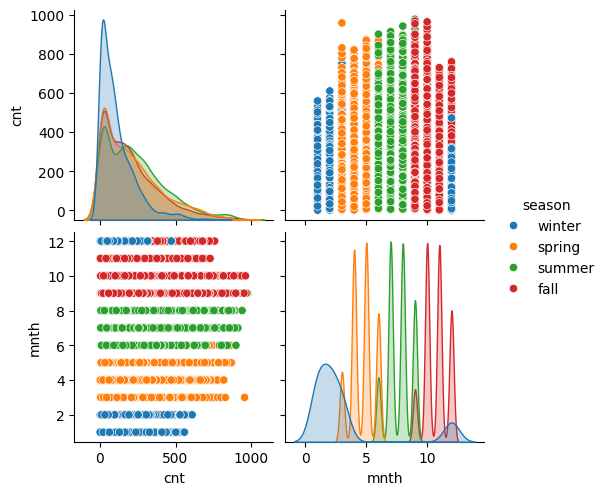

In [4]:
sns.pairplot(df[['season', 'cnt', 'mnth']], hue='season')

- Customers likes to rent bikes in Winter seasons.
- Company should increase the bike inventory to make sure customers can rent the bike in these demanding seasons.

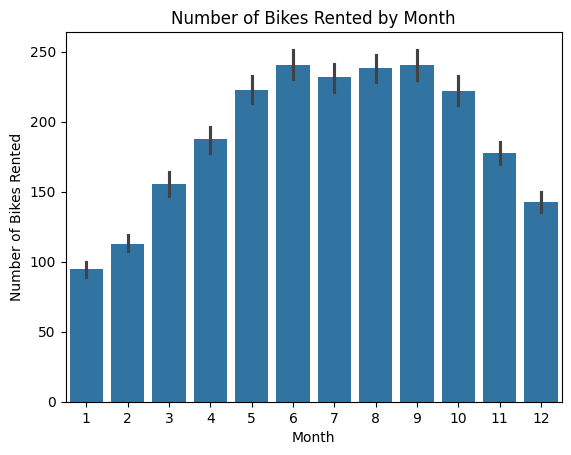

In [5]:
sns.barplot(x='mnth', y='cnt', data=df)

plt.xlabel('Month')
plt.ylabel('Number of Bikes Rented')
plt.title('Number of Bikes Rented by Month')
plt.show()

- Months of May to Octobers have more bike rents compare to other Months

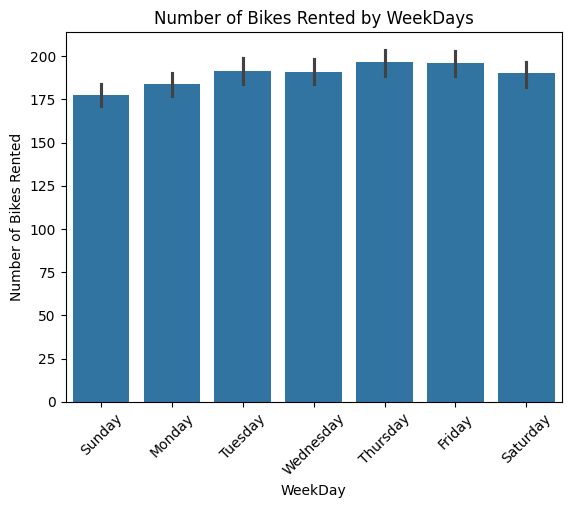

In [6]:
sns.barplot(x='weekday', y='cnt', data=df)

plt.xlabel('WeekDay')
plt.ylabel('Number of Bikes Rented')
plt.title('Number of Bikes Rented by WeekDays')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], 
           labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xticks(rotation=45)
plt.show()

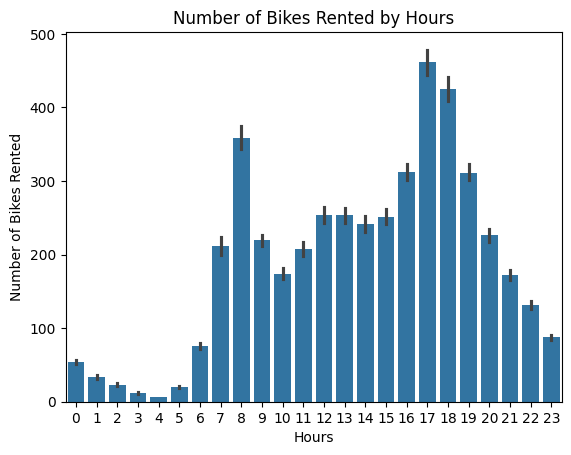

In [7]:
sns.barplot(x='hr', y='cnt', data=df)

plt.xlabel('Hours')
plt.ylabel('Number of Bikes Rented')
plt.title('Number of Bikes Rented by Hours')
plt.show()

- Demand for bikes peaks at 8:00 and 17:00. Company should focus on these peak hours to make bikes more available at these peak hours.

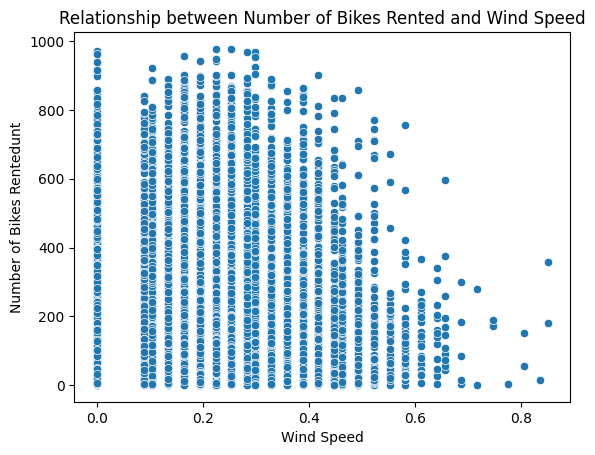

In [8]:
sns.scatterplot(x='windspeed', y='cnt', data=df)

plt.xlabel('Wind Speed')
plt.ylabel('Number of Bikes Rentedunt')
plt.title('Relationship between Number of Bikes Rented and Wind Speed')
plt.show()

- higher wind speeds drops the demand for bikes.

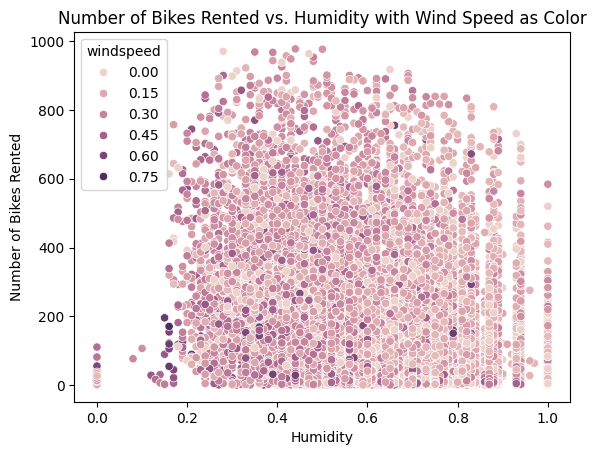

In [9]:
# Scatter plot for cnt vs. hum with windspeed as color
sns.scatterplot(x='hum', y='cnt', data=df, hue='windspeed')

plt.xlabel('Humidity')
plt.ylabel('Number of Bikes Rented')
plt.title('Number of Bikes Rented vs. Humidity with Wind Speed as Color')
plt.show()

([<matplotlib.axis.XTick at 0x1defbc08890>,
 [Text(0, 0, 'Clear'),
  Text(1, 0, 'Mist'),
  Text(2, 0, 'Light Snow'),
  Text(3, 0, 'Heavy Rain')])

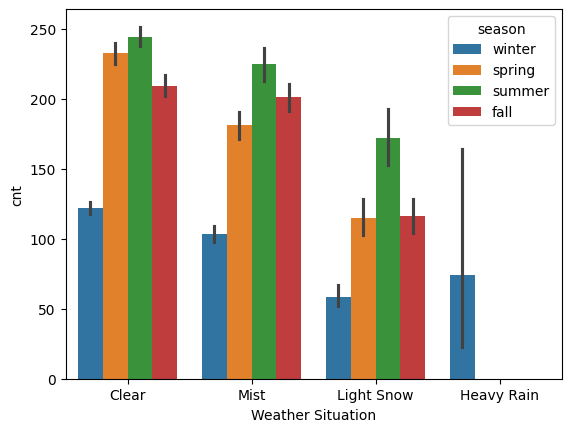

In [10]:
# barplot for cnt vs. weathersit with season as color
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
sns.barplot(x='weathersit', y='cnt', data=df, hue='season')
plt.xlabel('Weather Situation')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Snow', 'Heavy Rain'])

- Summer generally having the highest rentals and heavy rain the lowest.

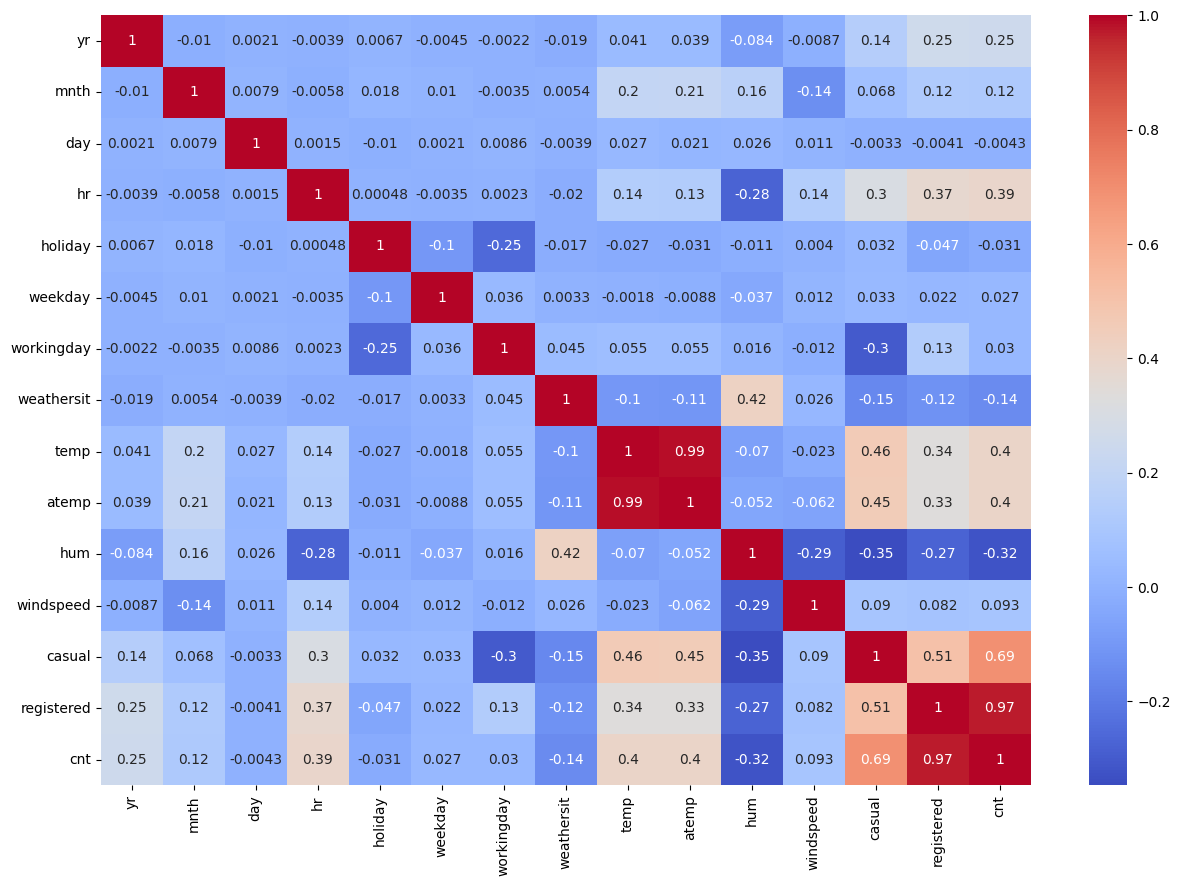

In [11]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

# Reading Trained models Metrics :

In [12]:
import json

with open(r'Metrics\GradientBoostingRegressor.json', 'r') as f: # metrics for GradientBoostingRegressor
    metrics = json.load(f)
for x in metrics:
    print(f"{x}: {metrics[x]}")

print("\n\n")

with open(r'Metrics\RandomForestRegressor.json', 'r') as f: # metrics for RandomForestRegressor
    metrics = json.load(f)
for x in metrics:
    print(f"{x}: {metrics[x]}")

Model Name: GradientBoostingRegressor
cross_val_score: 0.8504362798835914
Best Params: {'gradientboostingregressor__learning_rate': 0.13051273301300587, 'gradientboostingregressor__max_depth': 60, 'gradientboostingregressor__max_features': 0.5, 'gradientboostingregressor__min_samples_leaf': 8, 'gradientboostingregressor__min_samples_split': 16, 'gradientboostingregressor__n_estimators': 134}
Best Score: 0.9535007561795037
Test Score: 0.9517952786383385
RMSE_test: 39.982290131478365



Model Name: RandomForestRegressor
cross_val_score: 0.9429045522914528
Best Params: {'randomforestregressor__bootstrap': False, 'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 0.5, 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__min_samples_split': 6, 'randomforestregressor__n_estimators': 406}
Best Score: 0.9419561969814321
Test Score: 0.9421004064445435
RMSE_test: 43.81881567863358


# Loading trained model to fetch fetaure importances

In [13]:
import joblib
from preprocessor import preprocess
from trainer import ModelTrainer

In [14]:
model = joblib.load(r'Trained_model\GradientBoostingRegressor.pkl')

In [15]:
model

Pipeline(steps=[('preprocess', preprocess()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.13051273301300587,
                                           max_depth=60, max_features=0.5,
                                           min_samples_leaf=8,
                                           min_samples_split=16,
                                           n_estimators=134,
                                           random_state=42))])

In [16]:
model.get_feature_names_out

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('preprocess', preprocess()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.13051273301300587,
                                           max_depth=60, max_features=0.5,
                                           min_samples_leaf=8,
                                           min_samples_split=16,
                                           n_estimators=134,
                                           random_state=42))])>

In [17]:
feature_importance = model.named_steps['gradientboostingregressor'].feature_importances_
feature_name = model.named_steps['preprocess'].get_feature_names_out()

In [18]:
feature_importances_dict = dict(zip(feature_name, feature_importance))

In [19]:
for feature, importance in feature_importances_dict.items():
    print(f"Feature: {feature} => Importance: {importance}")

Feature: num__yr => Importance: 0.07649055285198417
Feature: num__mnth => Importance: 0.01599117247515254
Feature: num__day => Importance: 0.014366575781421661
Feature: num__hr => Importance: 0.5213548600559567
Feature: num__holiday => Importance: 0.0011105045534950165
Feature: num__weekday => Importance: 0.032480759368973454
Feature: num__workingday => Importance: 0.07029509140189279
Feature: num__weathersit => Importance: 0.013108073932940004
Feature: num__temp => Importance: 0.09035857764182162
Feature: num__atemp => Importance: 0.08039030097881306
Feature: num__hum => Importance: 0.04871028286521012
Feature: num__windspeed => Importance: 0.010091596373373998
Feature: cat__season_fall => Importance: 0.008252159758887889
Feature: cat__season_spring => Importance: 0.0015592381609102163
Feature: cat__season_summer => Importance: 0.0011792607585272951
Feature: cat__season_winter => Importance: 0.014260993040639568


In [20]:
feature_ = pd.DataFrame(feature_importances_dict.items(), columns=['Feature', 'Importance'])

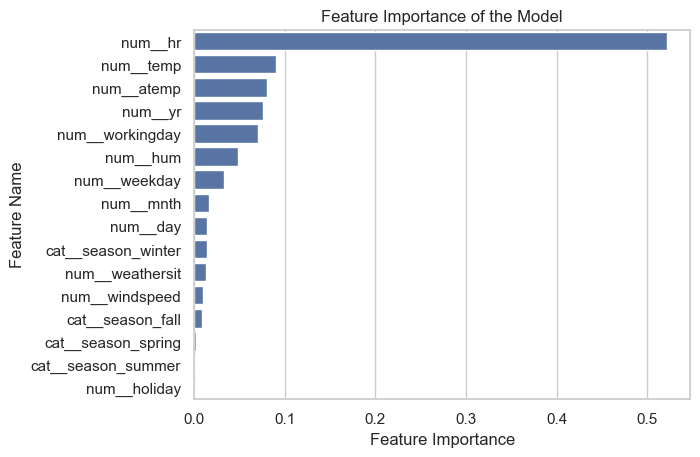

In [21]:
feature_ = feature_.sort_values(by='Importance', ascending=False)
sns.set_theme(style="whitegrid")
sns.barplot(x='Importance', y='Feature', data=feature_)

plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance of the Model')
plt.show()

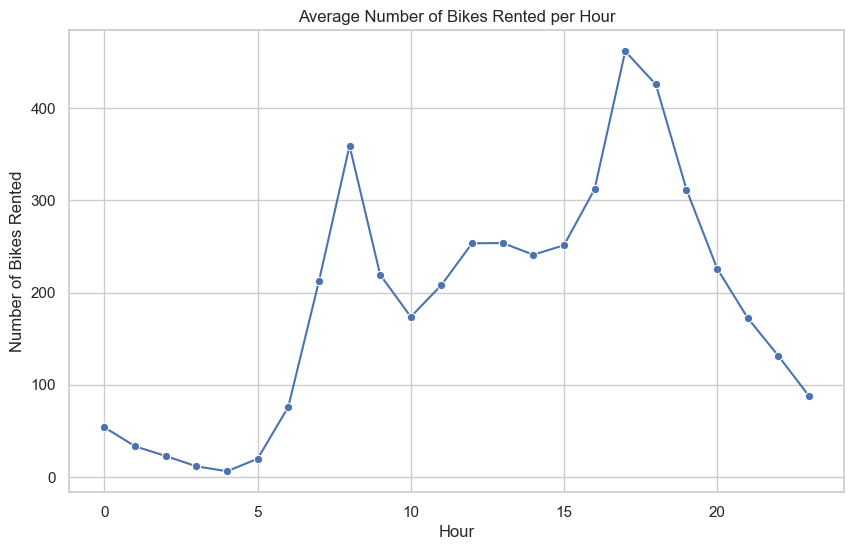

In [22]:
mean_bikes_per_hour = df.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_bikes_per_hour, x='hr', y='cnt', marker='o')

plt.xlabel('Hour')
plt.ylabel('Number of Bikes Rented')
plt.title('Average Number of Bikes Rented per Hour')

plt.show()

- Demand for bikes peaks at 8:00 and 17:00. Company should focus on these peak hours to make bikes more available at these peak hours.

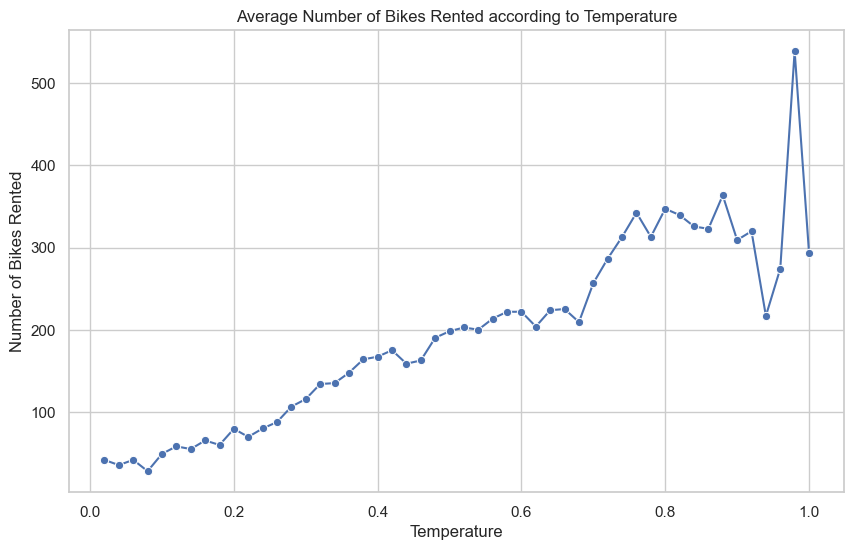

In [23]:
bike_temp = df.groupby('temp')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=bike_temp, x='temp', y='cnt', marker='o')

plt.xlabel('Temperature')
plt.ylabel('Number of Bikes Rented')
plt.title('Average Number of Bikes Rented according to Temperature')

plt.show()

- People tends to rent more bikes at higher temperatures

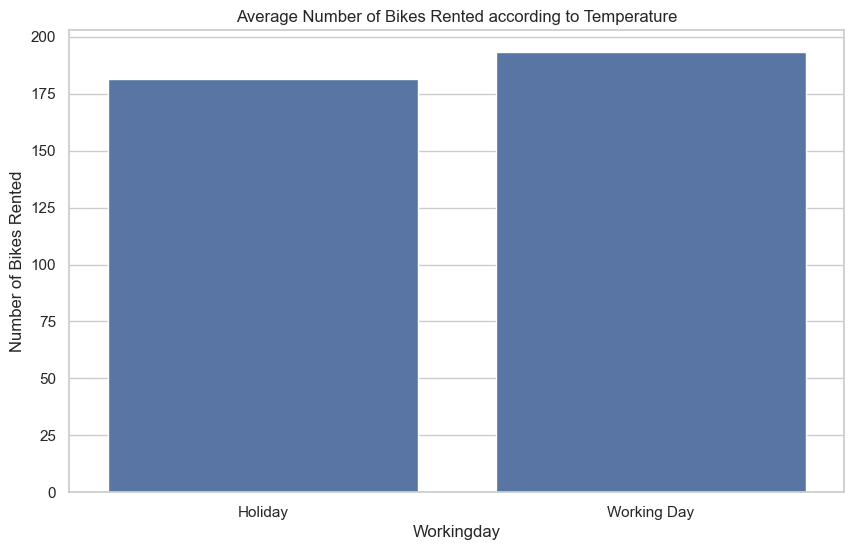

In [24]:
bike_workingday = df.groupby('workingday')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=bike_workingday, x='workingday', y='cnt')

plt.xlabel('Workingday')
plt.ylabel('Number of Bikes Rented')
plt.title('Average Number of Bikes Rented according to Temperature')
plt.xticks(ticks=[0, 1], labels=['Holiday', 'Working Day'])

plt.show()

- People tends to take more Bikes on working day than on Holidays

# Key points of Analysis


1.  **Hour (`num__hr`)**:
    
    -   **Importance**: 0.521
    -   **Analysis**: The hour of the day is the most important feature by a significant margin. This indicates that bike rental patterns are heavily influenced by the time of day, likely due to commuting patterns and recreational use during different times.
2.  **Temperature (`num__temp`) and Apparent Temperature (`num__atemp`)**:
    
    -   **Importance**: 0.090 and 0.080 respectively
    -   **Analysis**: Both actual temperature and perceived temperature play a critical role in bike rentals. Warmer weather likely encourages more bike usage, while extreme temperatures might deter it.
3.  **Year (`num__yr`)**:
    
    -   **Importance**: 0.076
    -   **Analysis**: The year is also a significant factor, suggesting that there might be trends or changes in bike rental patterns over the two years of data (2011 and 2012).
4.  **Working Day (`num__workingday`)**:
    
    -   **Importance**: 0.070
    -   **Analysis**: Whether a day is a working day or not is important. This aligns with expected behavior where bike rentals differ between weekdays and weekends/holidays.
5.  **Humidity (`num__hum`)**:
    
    -   **Importance**: 0.049
    -   **Analysis**: Humidity has a noticeable impact on bike rentals, possibly affecting comfort levels for riders.
6.  **Weekday (`num__weekday`)**:
    
    -   **Importance**: 0.032
    -   **Analysis**: The specific day of the week influences bike rentals, which might relate to weekly routines and habits.
7.  **Apparent Temperature (`num__atemp`)**:
    
    -   **Importance**: 0.080
    -   **Analysis**: The apparent or "feels-like" temperature is a critical factor, often correlating with user comfort during bike rides.
8.  **Season**:
    
    -   **Importance (combined)**: 0.025 (Fall: 0.008, Spring: 0.002, Summer: 0.001, Winter: 0.014)
    -   **Analysis**: Seasonality affects bike rentals, with specific seasons like winter and fall showing higher importance, potentially due to more favorable or unfavorable riding conditions.

### Less Influential Features

-   **Holiday (`num__holiday`)**:
    
    -   **Importance**: 0.001
    -   **Analysis**: Whether the day is a holiday has minimal impact on bike rentals.
-   **Weather Situation (`num__weathersit`)**:
    
    -   **Importance**: 0.013
    -   **Analysis**: The weather situation is less influential than expected, although it still has some effect on rentals.
-   **Month (`num__mnth`)**:
    
    -   **Importance**: 0.016
    -   **Analysis**: The month of the year has a relatively low impact on bike rentals, possibly due to overlapping seasonal effects.
-   **Day (`num__day`)**:
    
    -   **Importance**: 0.014
    -   **Analysis**: The specific day of the month has minimal impact on the number of bikes rented.
-   **Wind Speed (`num__windspeed`)**:
    
    -   **Importance**: 0.010
    -   **Analysis**: Wind speed has the least importance among weather-related features, indicating it might not significantly deter bike rentals.

# Conclusion
-   The analysis reveals that the time of day (hour), temperature (both actual and apparent), year, and whether it's a working day are the most critical factors influencing bike rentals. Understanding these patterns can help in optimizing bike-sharing programs, ensuring availability during peak times, and planning for seasonal maintenance and marketing strategies.